Vamos a ver la lógica que hay detrás del algoritmo de regresión lineal simple, que a través de optimización busca encontrar los minimos de la función de costo, con el objetivo de encontrar la mejor recta que ajuste a los datos. 

Algoritmo que busca en el espacio de todas las posibles lineas, la mejor que ajuste. 

Para cualquier linea dada, podriamos calcular el costo de esa línea. 

¿Como minimizar $W_{0}$ y $W_{1}$?

$$ g(w_0,w_1) = sum(g_i - [w_0 + w_1 * x_i])^2 = RSS(w_0,w_1)$$ 


La idea primitiva es pensar en las funciones concavas y convexas.

Hay funciones que no son ni concavas ni convexas. 

In [39]:
import matplotlib.pyplot as plt 
import numpy as np
from IPython.display import Image
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
def f1(x):
    y = 5 - (x-10)**2
    return y

def df1(x):
    y = -2 * (x-10)
    return y

def f2(x):
    y = 5 + (x+10) ** 2
    return y

def df2(x):
    y = 2 * (x+10)
    return y

In [3]:
x0 = np.linspace(-200,200,100)

Text(0.5, 0, 'convexa')

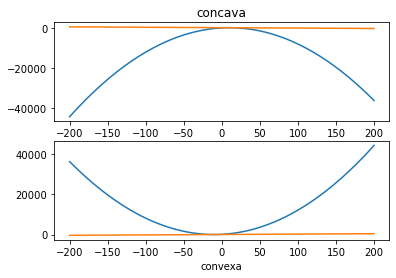

In [4]:
plt.subplot(2, 1, 1)
plt.plot(x0, f1(x0))
plt.plot(x0,df1(x0))
plt.title('concava')


plt.subplot(2, 1, 2)
plt.plot(x0,f2(x0))
plt.plot(x0,df2(x0))
plt.xlabel('convexa')

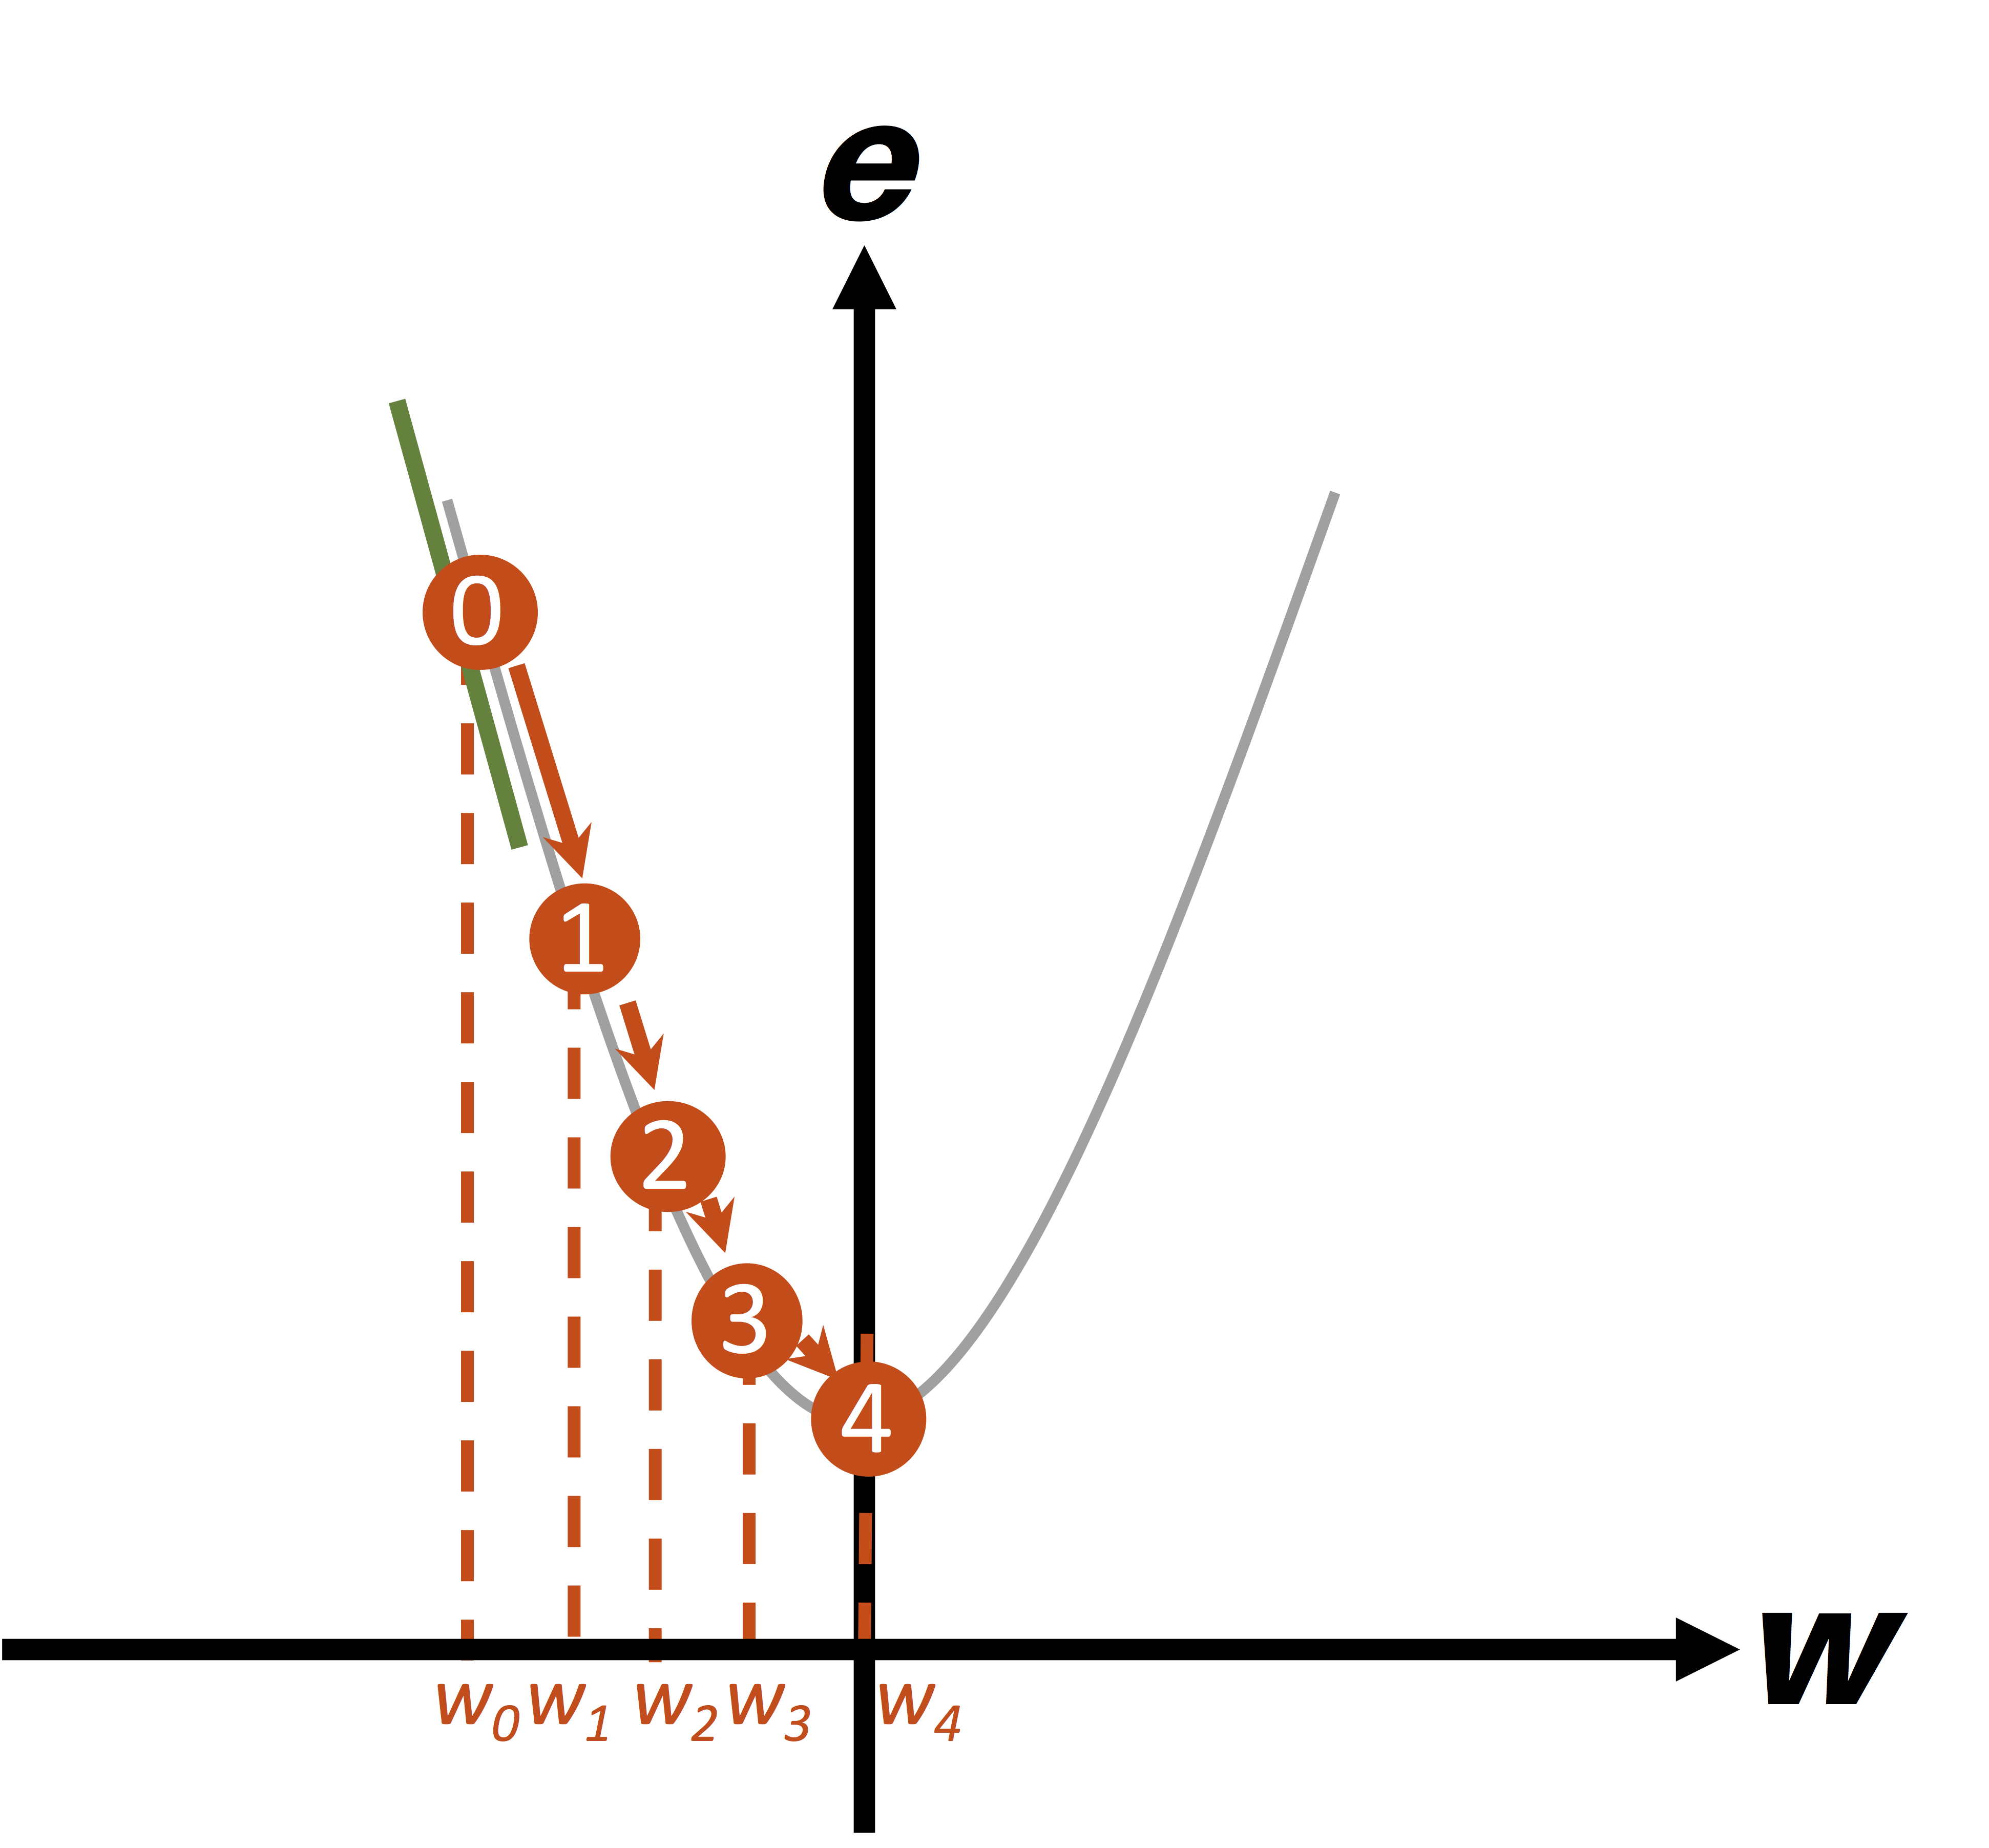

In [5]:
Image(filename = 'C:/Users/XMX5634/Documents/theory-of-ML-algorithms/imagenes/regresion_27.png')

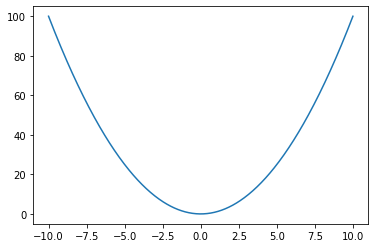

In [17]:
# Creamos la función a optimizar y la mostramos. 

f = lambda x: x ** 2
x = np.linspace(-10,10,500)
plt.plot(x, f(x))

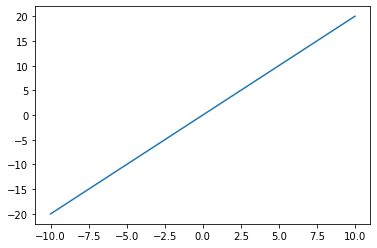

In [18]:
# Creamos la función de la derivada de x. 
df = lambda x: 2*x
plt.plot(x, df(x))

In [19]:

#Creamos la funcion del gradiente 
def gradient(x_start, precision, l_r):
    
    # creamos dos listas
    x_list, y_list = [x_start], [f(x_start)]
    
    # se realiza un bucle while. 
    while True:
        d_x = -df(x_start)
        
        # Obtenemos el nuevo valor de x sumando el valor previo de x + la multiplicacion del l_r por la derivada
        x_start += (l_r * d_x)
        
        # Agregamos el nuevo valor de x a la lista para posteriormente visualizarlo. 
        x_list.append(x_start)
        
        # Agregamos el nuevo valor de y a la lista para posteriomente visualizarlo. 
        y_list.append(f(x_start))
        
        # salir del bucle cuando se cumpla la condición 
        if abs(x_list[-1] - x_list[-2]) <= precision:
            break 
    # Visualizamos los resultados. 
    print('El mínimo local se produce en: ' + str(x_start))
    print('Número de pasos: '+ str(len(x_list)))
    
    plt.subplot(1,2,2)
    plt.scatter(x_list, y_list, c = 'g')
    plt.plot(x_list, y_list, c='g')
    plt.plot(x, f(x), c='r')
    plt.title('El Descenso del gradiente')
    plt.show()

El mínimo local se produce en: 0.4239115827521617
Número de pasos: 31


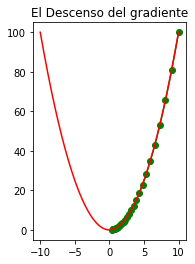

In [28]:
gradient(10, 0.05, 0.05)

# Ajustando las rectas a un conjunto de datos a través del Gradiente Descendiente

In [174]:

#Creamos la funcion del gradiente 
def gradient(X,Y, precision, tolerance):
    import pandas as pd 
    
    df = pd.DataFrame({'X': X, 'Y': Y})
    intercepto_inicial, pendiente_inicial = 0,0
    recta = lambda m,x,b: b + (m*x)
    
    plt.figure(figsize = (10,10))
    plt.scatter(X,Y, c = 'black')
    
    i=1
    
    while True:
                        
        df['prediction'] = df['X'].apply(lambda x: recta(pendiente_inicial,x,intercepto_inicial))
        df['prediction_error'] = df['prediction'] - df['Y']
        
        if i <= 10:
            plt.plot(X,df['prediction'] , c= 'green')
        
        #update intercept
        upd_inter = sum(df['prediction_error'])
        ajuste_1 = precision * upd_inter
        intercepto_inicial = intercepto_inicial - ajuste_1
        
        #update slope
        upd_slop =  sum(np.array(df['X']) * np.array(df['prediction_error']))
        ajuste_2 = precision * upd_slop
        pendiente_inicial = pendiente_inicial - ajuste_2
        
        #magnitude
        mag = np.sqrt( (upd_inter ** 2) + (upd_slop ** 2) )
        
        if mag < tolerance:
            print('Iteración {}'.format(i))
            print('Intercepto: {}'.format(intercepto_inicial))
            print('Pendiente: {}'.format(pendiente_inicial))
            plt.plot(X,df['prediction'] , c= 'red')
            
            df =  df.rename({'prediction': 'prediction_'+ str(i), 'prediction_error': 'prediction_error_'+str(i)}, axis=1)
            break
            
        df = df.drop(['prediction', 'prediction_error'], axis = 1)
        
        i+=1

Iteración 183
Intercepto: 0.0030429177268760073
Pendiente: 2.5989650368991306


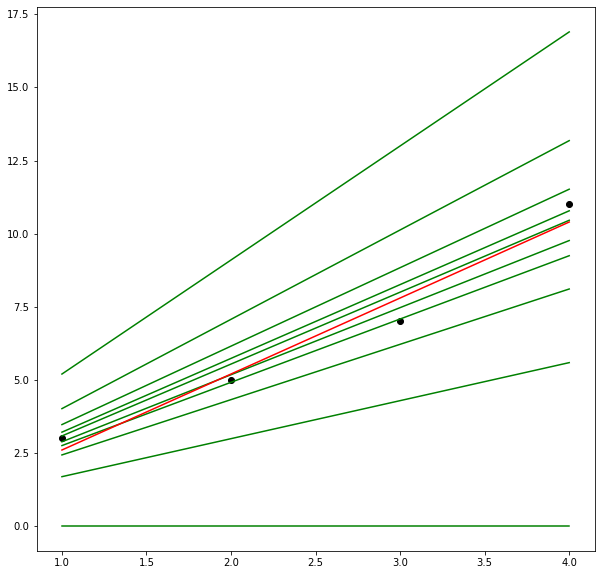

In [175]:
gradient([1,2,3,4],[3,5,7,11],0.05,0.002)